Linking: https://zhuanlan.zhihu.com/p/612214552

下面对sklearn.cluster模块中的参数进行说明.该函数的调用方法为 DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

该算法提供了多个可调参数，以控制算法的聚类效果。下面对常用的参数进行详细说明：

- eps: 控制着半径的大小，是判断两个数据点是否属于同一簇的距离阈值。默认值为0.5。
- min_samples: 控制着核心点周围所需的最小数据点数。默认值为5。
- metric: 用于计算距离的度量方法，可以选择的方法包括欧式距离(euclidean)、曼哈顿距离(manhattan)等。默认值为欧式距离。
- algorithm: 用于计算距离的算法，可以选择的算法包括Ball Tree(ball_tree)、KD Tree(kd_tree)和brute force(brute)。Ball Tree和KD Tree算法适用于高维数据，brute force算法适用于低维数据。默认值为auto，自动选择算法。
- leaf_size: 如果使用Ball Tree或KD Tree算法，这个参数指定叶子节点的大小。默认值为30。
- p: 如果使用曼哈顿距离或闵可夫斯基距离(minkowski)，这个参数指定曼哈顿距离的p值。默认值为2，即欧式距离。
- n_jobs: 指定并行运算的CPU数量。默认值为1，表示单CPU运算。如果为-1，则使用所有可用的CPU。
- metric_params: 如果使用某些度量方法需要设置额外的参数，可以通过这个参数传递这些参数。默认值为None。

In [4]:
# vs code写代码时候执行
import sys, os
sys.path.append("..")  # 跳到上级目录下面（sys.path添加目录时注意是在windows还是在Linux下，windows下需要‘\\'否则会出错。）
colab_path = "."
if os.path.exists(colab_path):
    sys.path.append(colab_path)

In [5]:
# 如果你的Notebook运行时不能实时反应import的.py文件的代码变化
# 特别是当你同时在.py文件里写写改改然后在Notebook里尝试运行它的时候

# 在Notebook里添加自动重新加载
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from rich import print
# from rich.progress import track
import matplotlib
from sklearn.metrics import silhouette_samples, silhouette_score
import scikitplot as skplt
from sklearn.cluster import DBSCAN

In [7]:
plt.style.use(['science','no-latex', 'grid'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5
# plt.rcParams['xtick.major.size'] = 5
# plt.rcParams['ytick.major.size'] = 5
# plt.rcParams['xtick.minor.size'] = 2
# plt.rcParams['ytick.minor.size'] = 2

# 设置保存图片的格式和dpi
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['savefig.format'] = 'svg'

In [8]:
origin_df = pd.read_excel("./datasets/副本shujulianxi.xlsx", sheet_name=0)

In [9]:
origin_df

,Unnamed: 0,[2010-01-01]2010-01-01,照片ID,照片标题,照片URL,经度,纬度,拍摄时间,用户ID,用户昵称,用户所在地
0,0,[2010-01-01]2010-01-01,51961216398,Gushan Ferry Pier Station,https://live.staticflickr.com/65535/5196121639...,22.619784,120.269887,2010-01-03 14:20:57,75212875@N02,Ando.Y,Japan
1,1,[2010-01-01]2010-01-01,36046837416,"National Revolutionary Martyrs' Shrine, Taipei...",https://live.staticflickr.com/4297/36046837416...,25.080040,121.532810,2010-01-10 15:15:00,59238173@N07,JH_1982,"Frankfurt, GER"
2,2,[2010-01-01]2010-01-01,33051240000,View of Hehuan River Trail,https://live.staticflickr.com/3752/33051240000...,24.169146,121.228133,2010-01-10 15:57:26,147357735@N04,l0001_2001,"New Taipei City, Taiwan"
3,3,[2010-01-01]2010-01-01,26603850872,高雄旗津渡輪,https://live.staticflickr.com/1678/26603850872...,22.614119,120.269608,2010-01-25 02:33:26,27744753@N08,Ivy Lin/NO妹,"台北市, 台灣"
4,4,[2010-01-01]2010-01-01,23175214010,leofoo2010_53,https://live.staticflickr.com/5797/23175214010...,24.822055,121.181111,2010-01-26 15:33:57,96087321@N07,徐喵丸,NaN
...,...,...,...,...,...,...,...,...,...,...,...
155291,328457,[2020-12-01]2020-12-01,50682413851,台中中央公園,NaN,24.191093,120.653432,2020-12-05 10:01:33,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155292,328458,[2020-12-01]2020-12-01,50682484402,台中中央公園,NaN,24.191073,120.653496,2020-12-05 10:02:15,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155293,328459,[2020-12-01]2020-12-01,50682483992,台中中央公園,NaN,24.191034,120.653647,2020-12-05 10:03:23,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155294,328460,[2020-12-01]2020-12-01,50682412356,台中中央公園,NaN,24.191034,120.653507,2020-12-05 10:06:17,26389679@N07,hanklee_art,"Taichung City, Taiwan"


In [10]:
origin_df.columns

Index(['Unnamed: 0', '[2010-01-01]2010-01-01', '照片ID', '照片标题', '照片URL', '经度',
       '纬度', '拍摄时间', '用户ID', '用户昵称', '用户所在地'],
      dtype='object')

In [11]:
origin_df['拍摄时间'] = pd.to_datetime(origin_df['拍摄时间']).dt.strftime("%Y-%m-%d")
origin_df

,Unnamed: 0,[2010-01-01]2010-01-01,照片ID,照片标题,照片URL,经度,纬度,拍摄时间,用户ID,用户昵称,用户所在地
0,0,[2010-01-01]2010-01-01,51961216398,Gushan Ferry Pier Station,https://live.staticflickr.com/65535/5196121639...,22.619784,120.269887,2010-01-03,75212875@N02,Ando.Y,Japan
1,1,[2010-01-01]2010-01-01,36046837416,"National Revolutionary Martyrs' Shrine, Taipei...",https://live.staticflickr.com/4297/36046837416...,25.080040,121.532810,2010-01-10,59238173@N07,JH_1982,"Frankfurt, GER"
2,2,[2010-01-01]2010-01-01,33051240000,View of Hehuan River Trail,https://live.staticflickr.com/3752/33051240000...,24.169146,121.228133,2010-01-10,147357735@N04,l0001_2001,"New Taipei City, Taiwan"
3,3,[2010-01-01]2010-01-01,26603850872,高雄旗津渡輪,https://live.staticflickr.com/1678/26603850872...,22.614119,120.269608,2010-01-25,27744753@N08,Ivy Lin/NO妹,"台北市, 台灣"
4,4,[2010-01-01]2010-01-01,23175214010,leofoo2010_53,https://live.staticflickr.com/5797/23175214010...,24.822055,121.181111,2010-01-26,96087321@N07,徐喵丸,NaN
...,...,...,...,...,...,...,...,...,...,...,...
155291,328457,[2020-12-01]2020-12-01,50682413851,台中中央公園,NaN,24.191093,120.653432,2020-12-05,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155292,328458,[2020-12-01]2020-12-01,50682484402,台中中央公園,NaN,24.191073,120.653496,2020-12-05,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155293,328459,[2020-12-01]2020-12-01,50682483992,台中中央公園,NaN,24.191034,120.653647,2020-12-05,26389679@N07,hanklee_art,"Taichung City, Taiwan"
155294,328460,[2020-12-01]2020-12-01,50682412356,台中中央公園,NaN,24.191034,120.653507,2020-12-05,26389679@N07,hanklee_art,"Taichung City, Taiwan"


In [12]:
origin_df.drop_duplicates(subset=['用户ID', '拍摄时间'], keep="first", inplace=True)

In [13]:
X = origin_df[['经度', '纬度']].astype('float16')  # .iloc[:5000]
X

,经度,纬度
0,22.625000,120.2500
1,25.078125,121.5625
2,24.171875,121.2500
3,22.609375,120.2500
4,24.828125,121.1875
...,...,...
155258,23.875000,120.9375
155259,24.140625,120.6875
155260,23.843750,120.8750
155289,25.046875,121.5625


In [22]:
MIN_SAMPLES = 100

In [23]:
# 调用scikitplot绘图
def plot_silhouette_of_various_clusters(eps_li: list, min_samples: int=MIN_SAMPLES) -> pd.DataFrame:
    """绘制DBSCAN在不同eps下的轮廓系数图, 并保存不同eps下的轮廓系数值和聚类簇数

    Args:
        eps_li (list): eps取值list
        min_samples (int, optional):每簇的最小样本量. Defaults to MIN_SAMPLES.

    Returns:
        pd.DataFrame: 包含不同eps下的轮廓系数值和聚类簇数结果的DataFrame
    """
    silhouette_score_list = []
    for i in eps_li:
        temp_y_predict = DBSCAN(eps=i, min_samples=min_samples).fit_predict(X)
        silhouette_score_ = silhouette_score(X, temp_y_predict)
        add_dict = {"eps": i, "silhouette_score": silhouette_score_, "cluster_num": len([value for value in np.unique(temp_y_predict) if value >= 0])}
        print(add_dict)
        silhouette_score_list.append(add_dict)
        skplt.metrics.plot_silhouette(X, temp_y_predict, figsize=(8,8),title=None, text_fontsize="small")
        # plt.xlim(-0.1, 0.5)
        plt.savefig('./assets/DBSCAN聚类eps为{}时各样本的轮廓系数值.svg'.format(str(i)), bbox_inches='tight')
        plt.show()
    return pd.DataFrame(silhouette_score_list)

{'eps': 0.005, 'silhouette_score': 0.20170606305988947, 'cluster_num': 52}


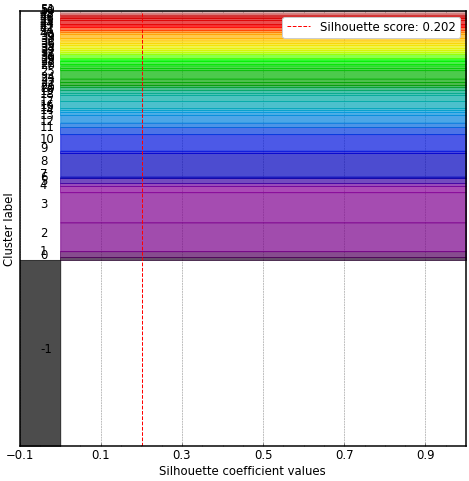

{'eps': 0.01, 'silhouette_score': 0.20170606305988947, 'cluster_num': 52}


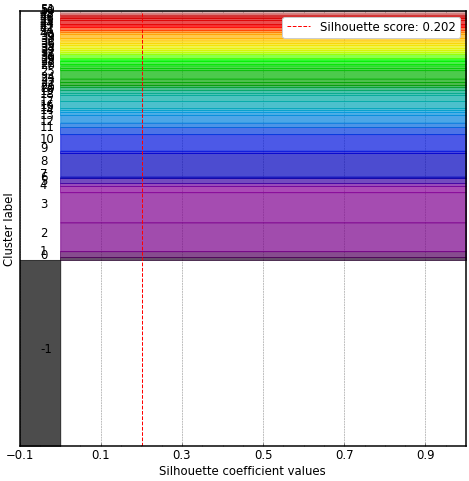

{'eps': 0.025, 'silhouette_score': 0.19616722453662205, 'cluster_num': 28}


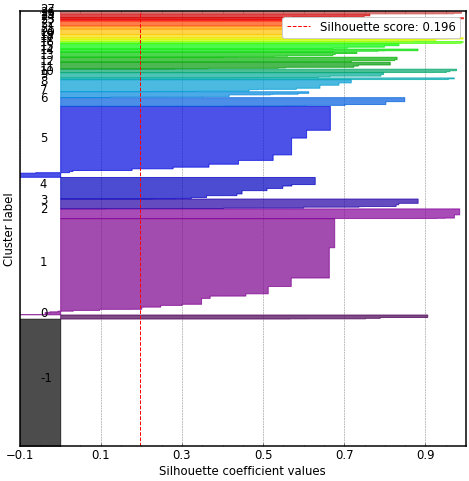

{'eps': 0.05, 'silhouette_score': 0.24622556750457997, 'cluster_num': 35}


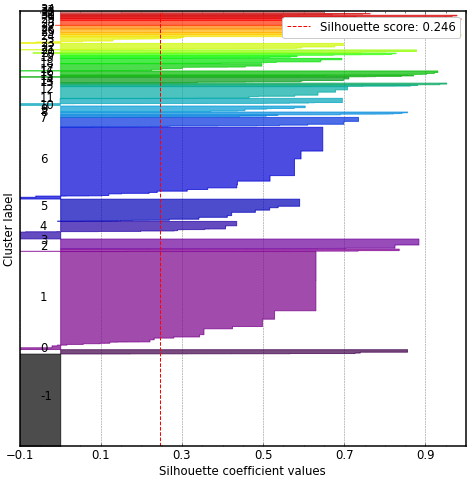

{'eps': 0.075, 'silhouette_score': 0.4325081394839258, 'cluster_num': 16}


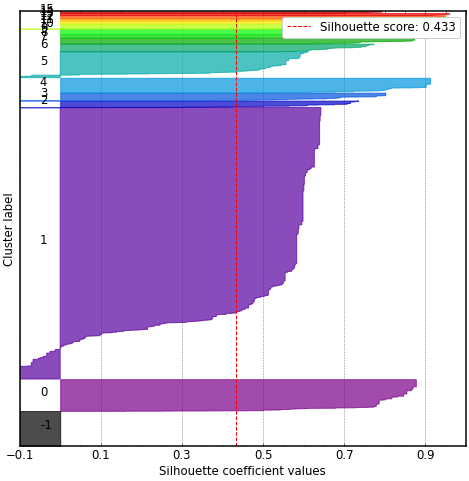

{'eps': 0.1, 'silhouette_score': 0.5576850149952253, 'cluster_num': 13}


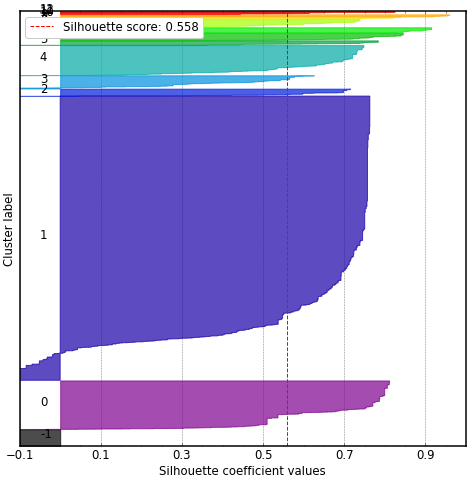

{'eps': 0.125, 'silhouette_score': 0.5792105932526223, 'cluster_num': 6}


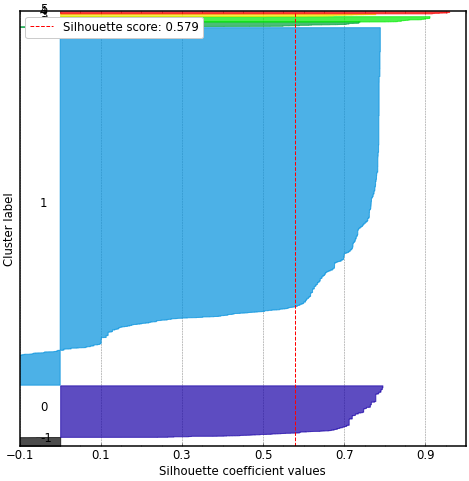

{'eps': 0.15, 'silhouette_score': 0.371683404821726, 'cluster_num': 5}


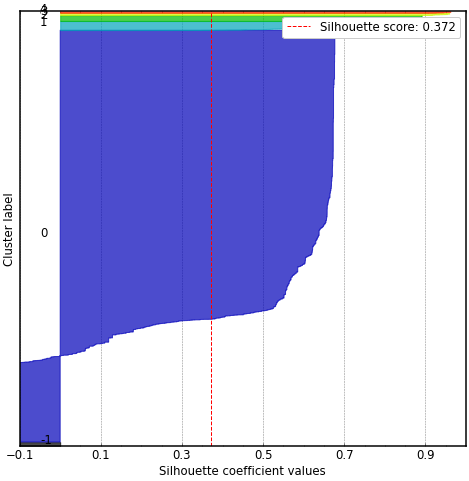

{'eps': 0.175, 'silhouette_score': 0.37123959874227874, 'cluster_num': 5}


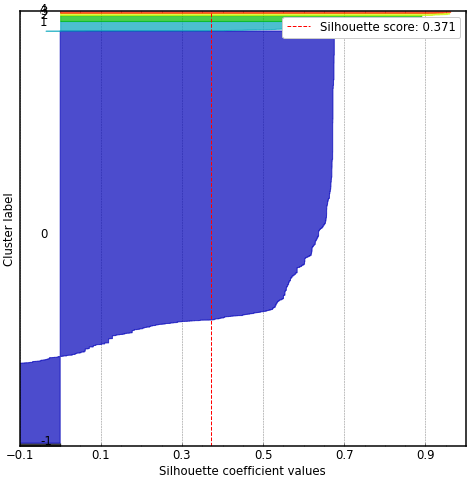

{'eps': 0.2, 'silhouette_score': 0.3893543933933843, 'cluster_num': 4}


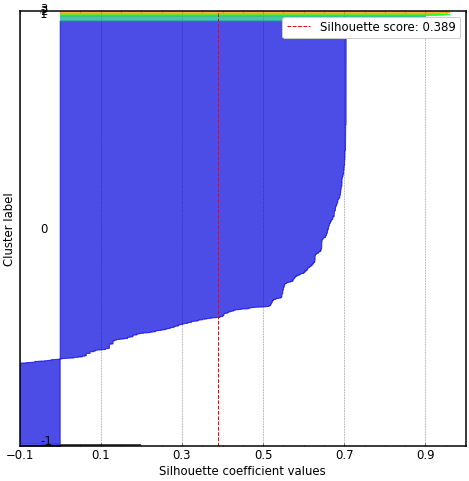

{'eps': 0.225, 'silhouette_score': 0.36818122906547424, 'cluster_num': 3}


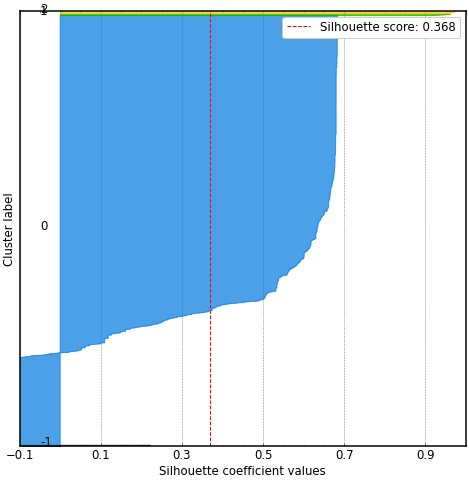

{'eps': 0.25, 'silhouette_score': 0.37124245149894824, 'cluster_num': 3}


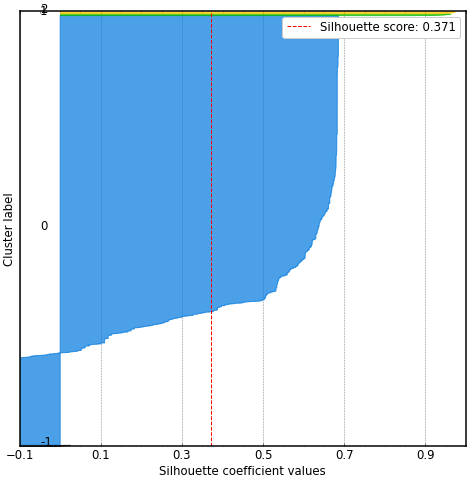

{'eps': 0.275, 'silhouette_score': 0.36869873640520473, 'cluster_num': 3}


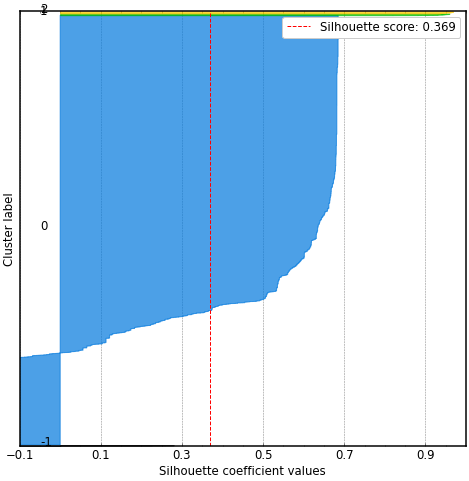

{'eps': 0.3, 'silhouette_score': 0.3838955039292719, 'cluster_num': 3}


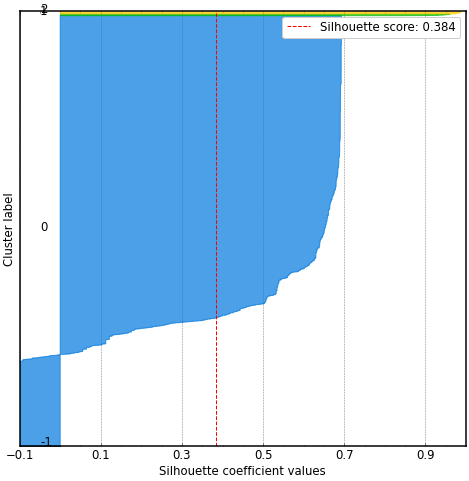

{'eps': 0.325, 'silhouette_score': 0.5005819773826712, 'cluster_num': 2}


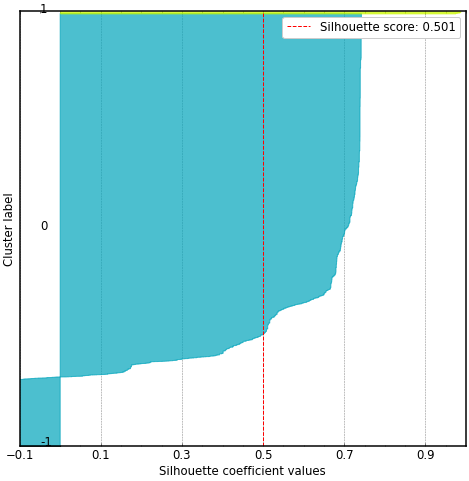

{'eps': 0.35, 'silhouette_score': 0.5048417438135556, 'cluster_num': 2}


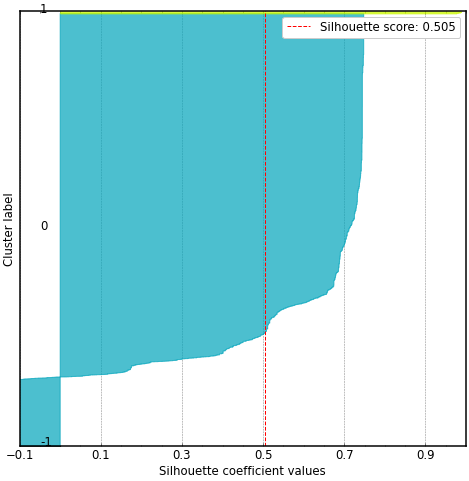

{'eps': 0.375, 'silhouette_score': 0.5048417438135556, 'cluster_num': 2}


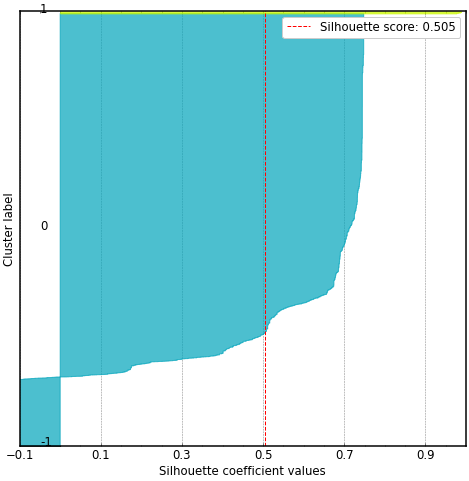

{'eps': 0.4, 'silhouette_score': 0.6545559319237644, 'cluster_num': 1}


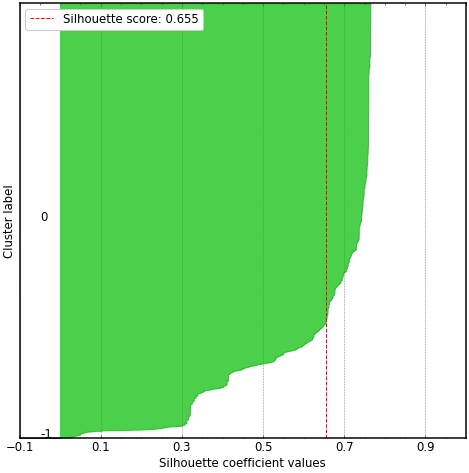

{'eps': 0.425, 'silhouette_score': 0.6545559319237644, 'cluster_num': 1}


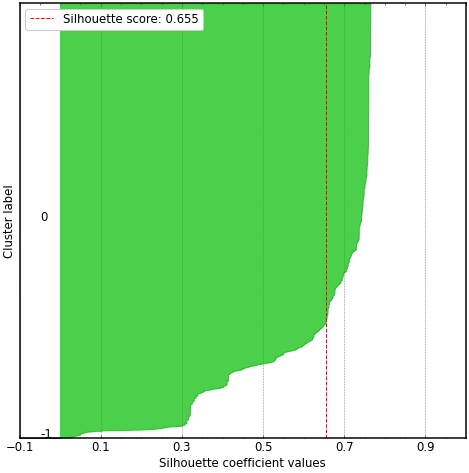

{'eps': 0.45, 'silhouette_score': 0.6545559319237644, 'cluster_num': 1}


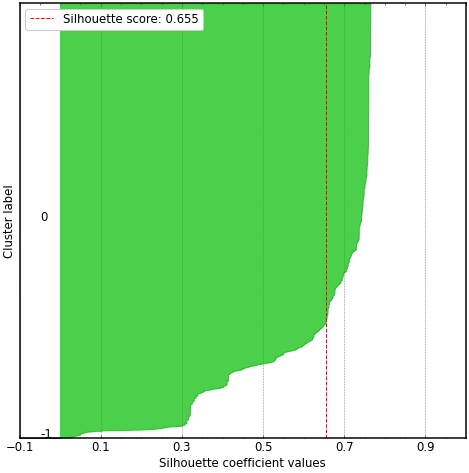

In [24]:
silhouette_score_df = plot_silhouette_of_various_clusters(eps_li=[0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 
                                                                0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45])

In [25]:
silhouette_score_df.to_csv("./assets/silhouette_score_df.csv", index=False, encoding="utf-8-sig")
silhouette_score_df

,eps,silhouette_score,cluster_num
0,0.005,0.201706,52
1,0.010,0.201706,52
2,0.025,0.196167,28
3,0.050,0.246226,35
4,0.075,0.432508,16
5,0.100,0.557685,13
6,0.125,0.579211,6
7,0.150,0.371683,5
8,0.175,0.371240,5
9,0.200,0.389354,4


In [26]:
silhouette_score_df = pd.read_csv("./assets/silhouette_score_df.csv")
silhouette_score_df

,eps,silhouette_score,cluster_num
0,0.005,0.201706,52
1,0.010,0.201706,52
2,0.025,0.196167,28
3,0.050,0.246226,35
4,0.075,0.432508,16
5,0.100,0.557685,13
6,0.125,0.579211,6
7,0.150,0.371683,5
8,0.175,0.371240,5
9,0.200,0.389354,4


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


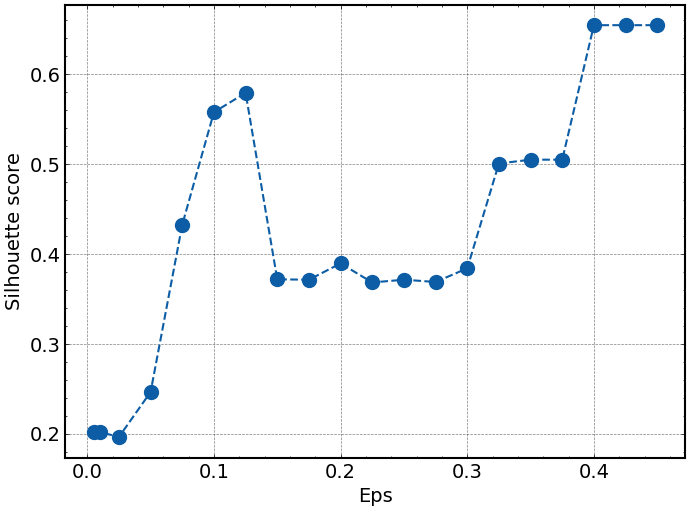

In [27]:
fig, ax = plt.subplots(1,1,figsize=(8,6), dpi=100) # 设定画布
ax.plot(silhouette_score_df['eps'], silhouette_score_df['silhouette_score'], marker='o', ls='--', lw=1.5, ms=10)
ax.set_xlabel('Eps')
ax.set_ylabel('Silhouette score')
plt.savefig('./assets/不同Eps下的Silhouette_score对比.svg', bbox_inches='tight')
plt.show()

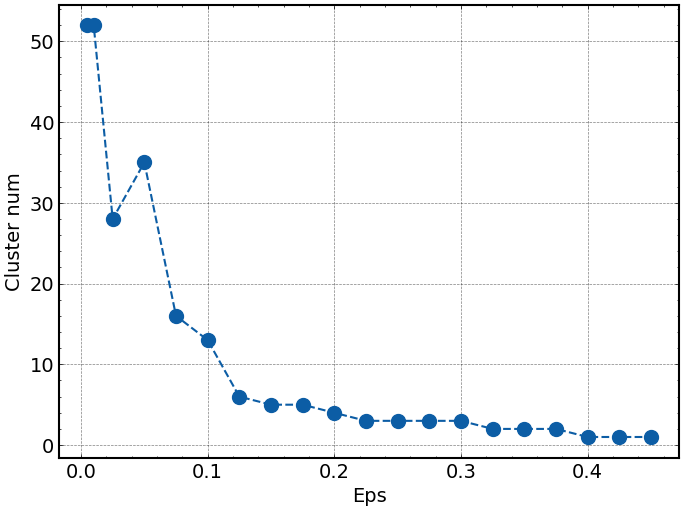

In [28]:
fig, ax = plt.subplots(1,1,figsize=(8,6), dpi=100) # 设定画布
ax.plot(silhouette_score_df['eps'], silhouette_score_df['cluster_num'], marker='o', ls='--', lw=1.5, ms=10)
ax.set_xlabel('Eps')
ax.set_ylabel('Cluster num')
plt.savefig('./assets/不同Eps下的cluster_num对比.svg', bbox_inches='tight')
plt.show()

In [29]:
y_pred = DBSCAN(eps=0.075, min_samples=MIN_SAMPLES).fit_predict(X)

In [30]:
pd.Series(y_pred).value_counts()

 1     18543
-1      2372
 0      2162
 5      1779
 4      1007
 3       529
 6       529
 2       457
 7       390
 9       348
 10      342
 8       242
 13      216
 11      192
 12      143
 14      141
 15      106
dtype: int64

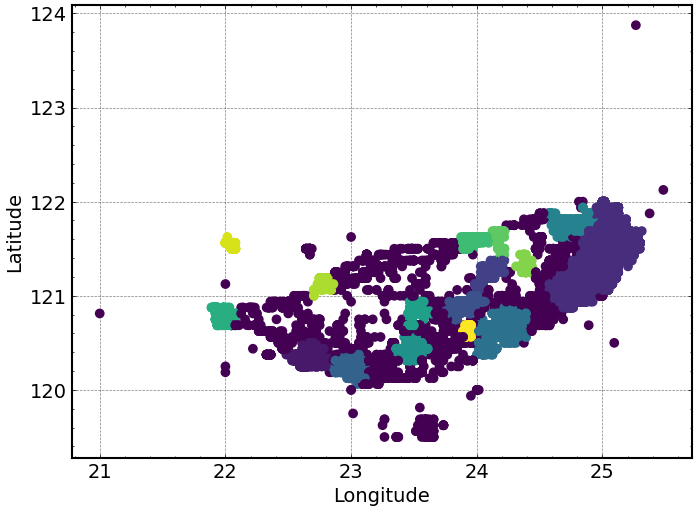

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8,6), dpi=100) # 设定画布
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('./assets/分布图', bbox_inches='tight')
plt.show()